In [54]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [55]:
# load data
df = pd.read_csv('../data/Mall_Customers.csv')

In [56]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [57]:
df.drop('CustomerID', axis=1, inplace=True)

In [58]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [59]:
# distribution of plots
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, subplot_titles=('Age', 'Annual Income (k$)', 'Spending Score (1-100)'))
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, col in enumerate(columns):
    hist = px.histogram(df, x=col, title=f'Distribution of {col}', nbins=30)
    fig.add_trace(hist['data'][0], row=1, col=i+1)
fig.show()

<Axes: xlabel='Gender'>

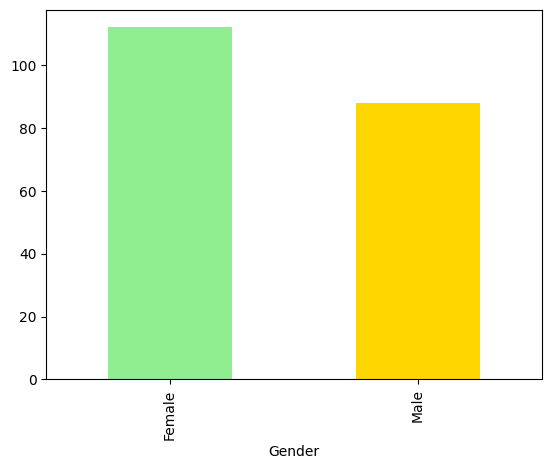

In [60]:
# gender wise count
gender_values = df['Gender'].value_counts()
gender_values.plot(kind='bar', color=['lightgreen', 'gold'])

In [61]:
# Age wise spending score
px.scatter(df, y='Age', x='Spending Score (1-100)', title='Age wise Spending')

In [62]:
# income wise spending score
px.scatter(df, y='Annual Income (k$)', x='Spending Score (1-100)', title='Income wise Spending')

In [63]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [64]:
# using encoder of gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [65]:
# using standard scaler for scaling
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [66]:
X_scaled = StandardScaler().fit_transform(X)

In [67]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [68]:
# using DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=9)

In [69]:
dbscan

DBSCAN(eps=0.9, min_samples=9)

In [70]:
df['Cluster'] = dbscan.fit_predict(X_scaled)

In [71]:
df['Cluster'].value_counts()

Cluster
 0    96
-1    42
 1    36
 3    16
 2    10
Name: count, dtype: int64

In [72]:
# visualization of clusters
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster', title='Clusters')

In [73]:
df.Cluster

0     -1
1     -1
2     -1
3      0
4      0
      ..
195    0
196   -1
197   -1
198   -1
199   -1
Name: Cluster, Length: 200, dtype: int64

In [77]:
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster', title='Clusters')
fig.show()